# Linear Regression with Gradient Descent in Python

## Gradient Descent
![alt text](gradient_descent.png)

## Learning Rate
![alt text](gradient_descent2.png)

In [8]:
import numpy as np

In [9]:
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

In [10]:
class LinearRegression:
    
    def __init__(self, learning_rate = 0.001, num_of_iters = 1000):
        self.lr = learning_rate
        self.num_of_iters = num_of_iters
        self.weights = None
        self.bias = None

    
    
    
    # Define the fit method with the training samples (X) and the training labels (y)
    # This is where the Gradient Descent is applied
    
    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initial parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.num_of_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    
    
    
    # Define the predict method with the test samples (X)
    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

# Linear Regression with Gradient Descent on Randomly Generated Data

MSE: 305.7719958301902
Accuracy: 0.9253717934621969


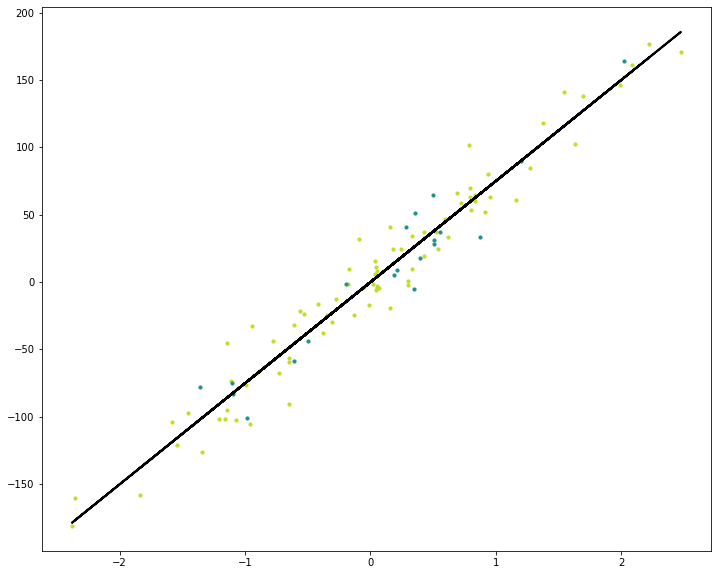

In [11]:
if __name__ == "__main__":
    
    
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    
    def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    
    # This will generate the sample data
    X, y = datasets.make_regression(
        n_samples=100, n_features=1, noise=20, random_state=4
    )

    
    # This will split the previously generated data into training samples/test samples and training labels/test labels
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    
    # Create Regressors
    regressor = LinearRegression(learning_rate=0.01, num_of_iters=1000)
    
    # Fit the training data
    regressor.fit(X_train, y_train)
    
    # Predict the test samples
    predictions = regressor.predict(X_test)

    # Cost function that shows the difference between the actual value and the approximated value
    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)

    # Shows the accuracy of our tests
    accu = r2_score(y_test, predictions)
    print("Accuracy:", accu)

    y_pred_line = regressor.predict(X)
    cmap = plt.get_cmap("viridis")
    fig = plt.figure(figsize=(12, 10))
    m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
    m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
    plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
    plt.show()